# Задача № 10
# Момент инерции
### Выполнил: Колабин Ю.В.
### Группа: 3822М1ФИии1

### **Условие**
Требуется определить внешний ***R*** и внутренний ***r*** радиусы цилиндрической трубы, если известны ее длина ***ℓ***, толщина $h = R − r$, плотность ***ρ*** и момент инерции относительно ее продольной оси ***I***.
Момент инерции для цилиндрической трубы вычисляется по формуле:
$$
I = \frac{\pi\rho l}{2}(R^{4} - r^{4})
$$
и задача сводится к решению кубического уравнения.

### **Подзадачи**
1. Вывести это кубическое уравнение.
2. Решить его численно для значений: $l = 2, h = 0.02, \rho = 1200, I = 1.2$; Выяснить, сколько вещественных корней имеет уравнение.
3. Построить график зависимости $r$ от $I$ при значениях $ℓ, h, ρ$, указанных выше.

## **Решение**

### **Подзадача № 1. Вывод кубического уравнения**

Необходимо найти внешний и внутренний радиусы цилиндрической трубы. Исходя из формулы, данной в условии, $h = R − r$, можно сделать вывод, что зная любой из радиуса, можно определить другой (т.к. $h$ дано). Я буду искать внутренний радиус цилиндра $r$.

Выражаю $R$ для дальнейшей подстановки:

$$
R = h + r
$$

Подставляю в формулу момента инерции:

$$
I = \frac{\pi\rho l}{2}((h + r))^{4} - r^{4})
$$

Упрощу часть выражения, воспользовавшись биномиальной формулой Ньютона:

$$
((h + r))^{4} - r^{4}) = h^4 + 4h^3r + 6h^2r^2 + 4hr^3 + r^4
$$

Получается следующее:

$$
I = \frac{\pi\rho l}{2}(r^3(4h) + r^2(6h^2) + r(4h^3) + h^4)
$$

Окончательно преобразую кубическое уравнение.

Воспользуюсь заменой $\omega = \pi\rho l$, чтобы сократить объем записи.

$$
r^3(2\omega h) + r^2(3\omega h^2) + r(2\omega h^3) + \frac{\omega h^4}{2} - I = 0
$$

### **Подзадача № 2. Численное решение полученного уравнения**

Скачиваю и подключаю рекомендуемую в условии библиотеку для нахождения корней уравнения методом Брента:

In [2]:
!pip install scipy


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from scipy import optimize as opt

In [4]:
import math

Напишу функцию, представляющее полученное кубическое уравнение, которую потом подставлю в функцию вычисления корней:

In [5]:
rho = 1200
l = 2
h = 0.02
I = 1.2

In [6]:
def cubic(r):
    omega = math.pi * rho * l
    return (math.pow(r, 3) * 2 * omega * h) + (math.pow(r, 2) * 3 * omega * math.pow(h, 2)) + (r * 2 * omega * math.pow(h, 3)) + ((omega * math.pow(h, 4)) / 2 - I)

Ищу корень на промежутке $[0, 1000000]$, т.к. считаю, что радиус неотрицателен и не больше 1000000 м.

Получаю вещественный корень, соответствующий необходимому внутреннему радиусу $r$, удовлетворяющему поставленным условиям:

In [7]:
r_small = opt.brentq(cubic, 0, 1000000)
print(r_small)

0.14824978647451836


Тогда внешний радиус R будет равен:

In [8]:
r_big = h + r_small
print(r_big)

0.16824978647451835


### **Подзадача № 3. График зависимости $r$ от $I$**

Для построения графика зависимости воспользуюсь возможностями библиотеки ***matplotlib***

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
omega = math.pi * rho * l

In [11]:
def cubic(r):
    omega = math.pi * rho * l
    return (math.pow(r, 3) * 2 * omega * h) + (math.pow(r, 2) * 3 * omega * math.pow(h, 2)) + (r * 2 * omega * math.pow(h, 3)) + ((omega * math.pow(h, 4)) / 2)

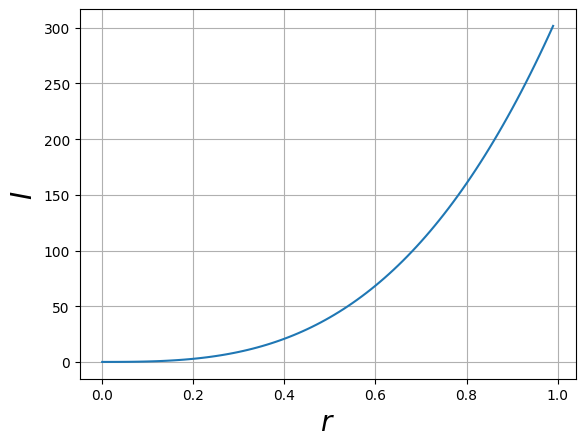

In [12]:
x = np.arange(0, 1, 0.01)
vect_func = np.vectorize(cubic)
plt.plot(x, vect_func(x))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$I$', fontsize=20)
plt.grid(True)
plt.show()